In [1]:
import numpy as np
import pandas as pd

import missingno as msno
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#現在の最大表示列数の出力
pd.get_option("display.max_columns")

#最大表示列数の指定（ここでは81列を指定）
pd.set_option('display.max_columns', 81)
#pd.reset_option('display.max_columns', 81) for reset

#現在の最大表示行数の出力
pd.get_option("display.max_rows")

#最大表示行数の指定（ここでは100行を指定）
pd.set_option('display.max_rows', 100)

In [3]:
df_train = pd.read_csv('train.csv')

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_train.shape

(1460, 81)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### 【問題1】練習のために特徴量の選択
データセットを読み込んだ後、`GrLivArea`と`YearBuilt`を抜き出してください。

In [8]:
x_columns = ['GrLivArea', 'YearBuilt']
y_column = ['SalePrice']

X_two_columns = pd.DataFrame(df_train, columns=x_columns)
y_saleprice = pd.DataFrame(df_train, columns=y_column)

df_concat = pd.concat([X_two_columns, y_saleprice], axis=1)

In [9]:
X_two_columns.head()

,GrLivArea,YearBuilt
0,1710,2003
1,1262,1976
2,1786,2001
3,1717,1915
4,2198,2000


In [10]:
y_saleprice.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


### 【問題2】線形回帰による推定と評価
データを簡単に分析、前処理し、 __線形回帰__ による学習、推定、評価、可視化までの一連の流れを作成・実行してください。


[sklearn.linear_model.LinearRegression — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)


評価のための指標値は回帰問題では __平均二乗誤差（Mean Squared Error, MSE）__ を使うことが一般的です。


[sklearn.metrics.mean_squared_error — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)


可視化は横軸にある特徴量、縦軸に推測した住宅価格といった方法で行えます。

- 分布の確認

   1. SalePrice

<AxesSubplot:xlabel='Sale Price'>

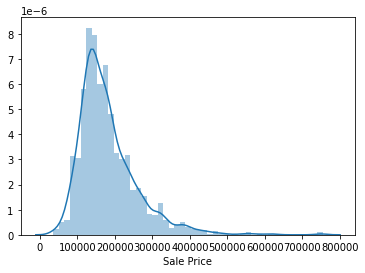

In [11]:
sns.distplot(df_concat['SalePrice'], axlabel='Sale Price')

In [12]:
print("歪度(Skewness) :", df_concat['SalePrice'].skew())
print("尖度(Kurtosis) :", df_concat['SalePrice'].kurt())

歪度(Skewness) : 1.8828757597682129
尖度(Kurtosis) : 6.536281860064529


In [13]:
df_concat['SalePrice_Log'] = df_concat['SalePrice'].apply(np.log)
df_concat['SalePrice_Log'].head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice_Log, dtype: float64

<AxesSubplot:xlabel='Sale Price Log'>

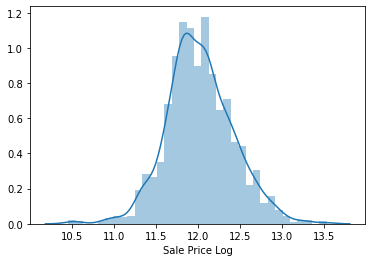

In [14]:
sns.distplot(df_concat['SalePrice_Log'], axlabel='Sale Price Log')

In [15]:
print("歪度(Skewness) :", df_concat['SalePrice_Log'].skew())
print("尖度(Kurtosis) :", df_concat['SalePrice_Log'].kurt())

歪度(Skewness) : 0.12133506220520406
尖度(Kurtosis) : 0.8095319958036296


2. GrLivArea

<AxesSubplot:xlabel='GrLivArea'>

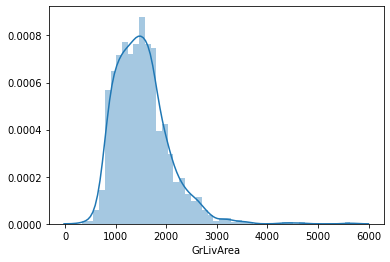

In [16]:
sns.distplot(df_concat['GrLivArea'])

In [17]:
print("歪度(Skewness) :", df_concat['GrLivArea'].skew())
print("尖度(Kurtosis) :", df_concat['GrLivArea'].kurt())

歪度(Skewness) : 1.3665603560164552
尖度(Kurtosis) : 4.895120580693174


In [18]:
df_concat['GrLivArea_Log'] = df_concat['GrLivArea'].apply(np.log)
df_concat['GrLivArea_Log'].head()

0    7.444249
1    7.140453
2    7.487734
3    7.448334
4    7.695303
Name: GrLivArea_Log, dtype: float64

<AxesSubplot:xlabel='GrLivArea Log'>

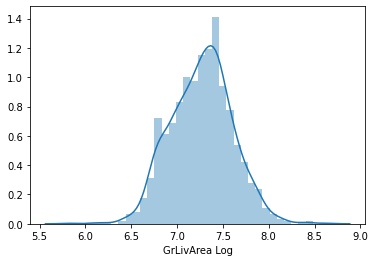

In [19]:
sns.distplot(df_concat['GrLivArea_Log'], axlabel='GrLivArea Log')

In [20]:
print("歪度(Skewness) :", df_concat['GrLivArea_Log'].skew())
print("尖度(Kurtosis) :", df_concat['GrLivArea_Log'].kurt())

歪度(Skewness) : -0.006995182187690808
尖度(Kurtosis) : 0.28260268850118564


3. YearBuilt

<AxesSubplot:xlabel='YearBuilt'>

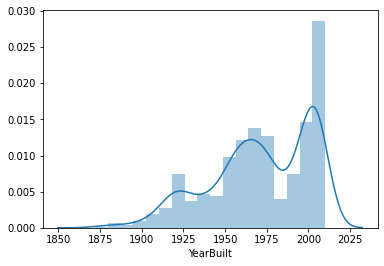

In [21]:
sns.distplot(df_concat['YearBuilt'])

時系データで対数変換無し\
2000年以降のデータが全体の約28%を構成

- 相関性の確認

In [22]:
corr_columns = ['GrLivArea_Log', 'YearBuilt', 'SalePrice_Log']
df_corr = pd.DataFrame(df_concat, columns=corr_columns)

In [23]:
corr_matrix = df_corr.corr()

<AxesSubplot:>

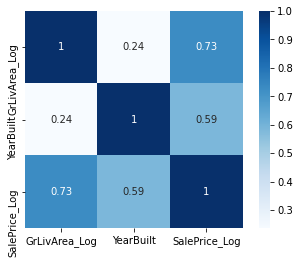

In [24]:
sns.heatmap(corr_matrix, annot=True, square=True, cmap="Blues")

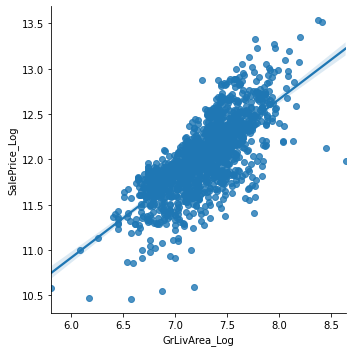

In [25]:
sns.lmplot(x='GrLivArea_Log',y='SalePrice_Log',data=df_concat)

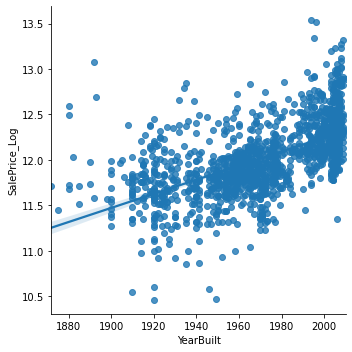

In [26]:
sns.lmplot(x='YearBuilt',y='SalePrice_Log',data=df_concat)

- 前処理・訓練データと検証データの分割

In [27]:
x_columns = ['GrLivArea_Log', 'YearBuilt']
y_column = ['SalePrice_Log']

df = df_corr.to_numpy()
X = df_corr[x_columns].to_numpy()
y = df_corr[y_column].to_numpy()

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

- 前処理・標準化

In [29]:
scaler = StandardScaler()

In [30]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [31]:
X_train_scaled = scaler.transform(X_train)

In [32]:
X_test_scaled = scaler.transform(X_test)

- 線形回帰による学習、推定、評価、可視化

In [33]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train.ravel())
lr_pred = lr_model.predict(X_test_scaled)

In [34]:
print("Mean Squared Error: {:.2f}".format(mean_squared_error(y_test, lr_pred)))

Mean Squared Error: 0.05


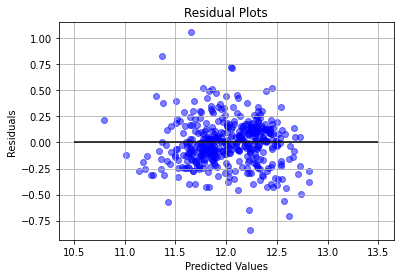

In [35]:
# テスト用データの残差プロット
plt.scatter(lr_pred, (lr_pred[:, np.newaxis] - y_test), c='b', alpha=0.5)

# y=0の水平線
plt.hlines(y=0,xmin=10.5,xmax=13.5, color='black')

plt.title('Residual Plots')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()

plt.show()  

### 【問題3】手法の比較
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と可視化した図を利用して結果を簡単に考察してください。どの手法がどの指標値が良かったかや、どういった図になっていたかを述べてください。


- 線形回帰
- SVM
- 決定木
- ランダムフォレスト

公式ドキュメントへのリンクは以下です。本来はパラメータチューニングを行いますが、まずはデフォルトの値で実行しましょう。


- [sklearn.linear_model.LinearRegression — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
- [sklearn.svm.SVR — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)
- [sklearn.tree.DecisionTreeRegressor — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
- [sklearn.ensemble.RandomForestRegressor — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

SVM、決定木、ランダムフォレストは分類問題でも使用した手法ですが、回帰問題用のライブラリはそれぞれ専用のものに分かれています。

1. 線形回帰

In [36]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train.ravel())
lr_pred = lr_model.predict(X_test_scaled)

In [37]:
print("Mean Squared Error: {:.5f}".format(mean_squared_error(y_test, lr_pred)))

Mean Squared Error: 0.04816


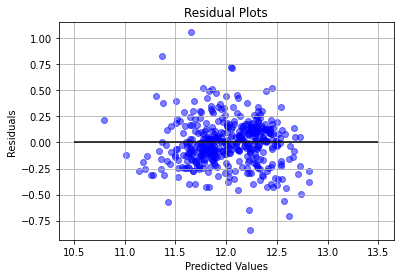

In [38]:
# テスト用データの残差プロット
plt.scatter(lr_pred, (lr_pred[:, np.newaxis] - y_test), c='b', alpha=0.5)

# y=0の水平線
plt.hlines(y=0,xmin=10.5,xmax=13.5, color='black')

plt.title('Residual Plots')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()

plt.show()  

2. SVM

In [39]:
svm_model = SVR()
svm_model.fit(X_train_scaled, y_train.ravel())
svm_pred = svm_model.predict(X_test_scaled)

In [40]:
print("Mean Squared Error: {:.5f}".format(mean_squared_error(y_test, svm_pred)))

Mean Squared Error: 0.04392


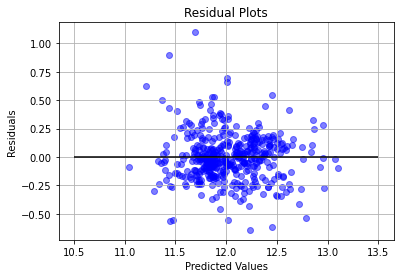

In [41]:
# テスト用データの残差プロット
plt.scatter(svm_pred, (svm_pred[:, np.newaxis] - y_test), c='b', alpha=0.5)

# y=0の水平線
plt.hlines(y=0,xmin=10.5,xmax=13.5, color='black')

plt.title('Residual Plots')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()

plt.show()  

3. 決定木

In [42]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train_scaled, y_train.ravel())
dt_pred = dt_model.predict(X_test_scaled)

In [43]:
print("Mean Squared Error: {:.5f}".format(mean_squared_error(y_test, dt_pred)))

Mean Squared Error: 0.07399


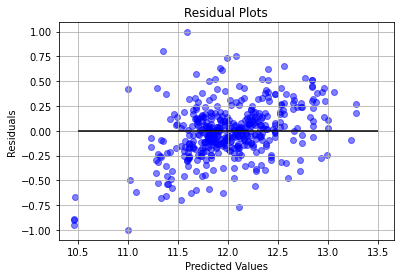

In [44]:
# テスト用データの残差プロット
plt.scatter(dt_pred, (dt_pred[:, np.newaxis] - y_test), c='b', alpha=0.5)

# y=0の水平線
plt.hlines(y=0,xmin=10.5,xmax=13.5, color='black')

plt.title('Residual Plots')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()

plt.show()  

4. ランダムフォレスト

In [45]:
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train_scaled, y_train.ravel())
rf_pred = rf_model.predict(X_test_scaled)

In [46]:
print("Mean Squared Error: {:.5f}".format(mean_squared_error(y_test, rf_pred)))

Mean Squared Error: 0.04519


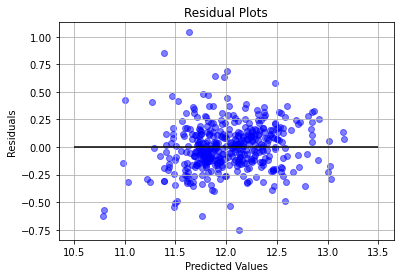

In [47]:
# テスト用データの残差プロット
plt.scatter(rf_pred, (rf_pred[:, np.newaxis] - y_test), c='b', alpha=0.5)

# y=0の水平線
plt.hlines(y=0,xmin=10.5,xmax=13.5, color='black')

plt.title('Residual Plots')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()

plt.show()  

- 指標値一覧表

In [48]:
def performance_measures(df, var):
    for key in range(len(var)):
        df.loc[df.index[key], 'MSE'] = mean_squared_error(y_test, var[key])
    return df

In [49]:
model_indexes = ['Linear Regression', 'SVM', 'Decision Tree', 'Random Forest']
score_columns = ['MSE']
predict_variables = [lr_pred, svm_pred, dt_pred, rf_pred]
performance_eval_scaled = pd.DataFrame(index=model_indexes, columns=score_columns)
performance_eval_scaled = performance_measures(performance_eval_scaled, predict_variables)

In [50]:
performance_eval_scaled

,MSE
Linear Regression,0.0481598
SVM,0.0439151
Decision Tree,0.073995
Random Forest,0.0451866


- 考察

SVMが最良のモデルとなっている。\
線形回帰・SVM・ランダムフォレストの平均二乗誤差は、近い数値となっている。\
決定木の残差プロットは、他の図と比較すると、より値が分散している事が確認できる。



### 【問題4】（アドバンス課題）他の特徴量も使用しての学習
ここまでは練習のために2つの特徴量だけを使いましたが、他の特徴量を加えるとどのようになるか検証してください。\
どう選択・加工するかにはデータ分析が重要になってきます。


KaggleのNotebooksも参考にできます。\
[House Prices: Advanced Regression Techniques | Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/kernels)

#### 「Week3_授業前課題2_住宅情報の分析」の欠損値への対応(1459行, 63列)の続きと仮定

- 欠損値への対応

<AxesSubplot:>

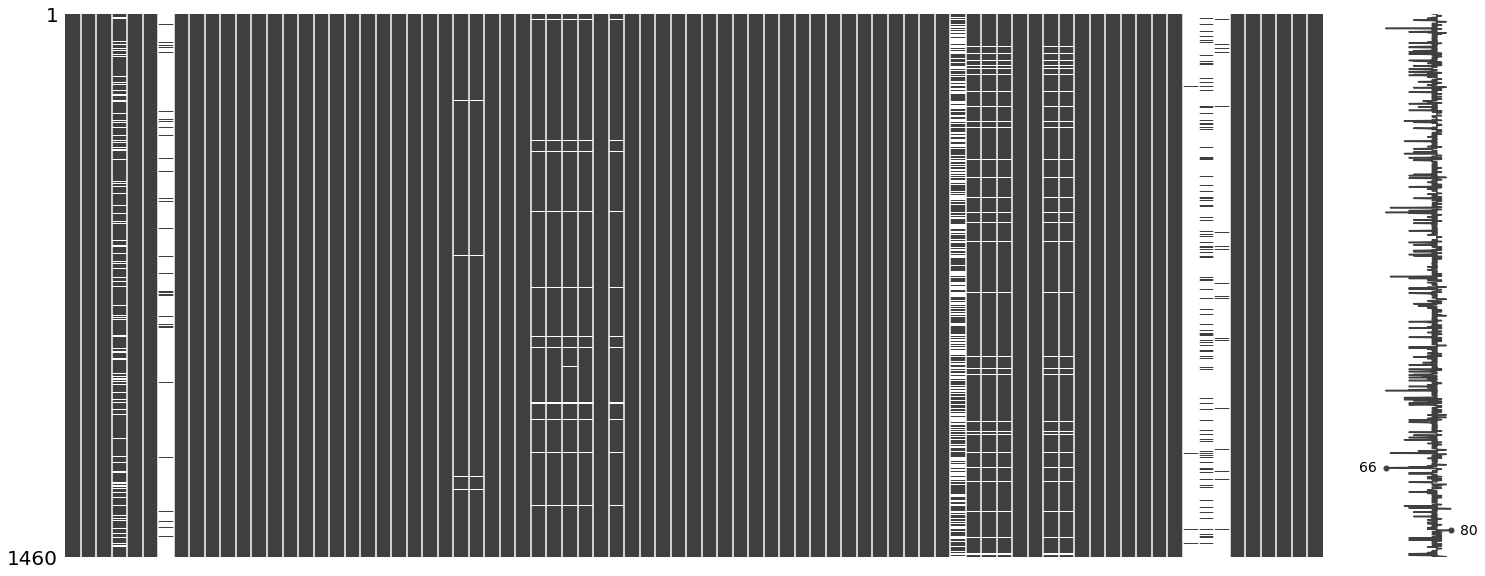

In [51]:
msno.matrix(df_train)

In [52]:
pd.options.display.float_format = '{: <10.2%}'.format

total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(sum(total > 0))

,Total,Percent
PoolQC,1453,99.52%
MiscFeature,1406,96.30%
Alley,1369,93.77%
Fence,1179,80.75%
FireplaceQu,690,47.26%
LotFrontage,259,17.74%
GarageCond,81,5.55%
GarageType,81,5.55%
GarageYrBlt,81,5.55%
GarageFinish,81,5.55%


In [53]:
pd.reset_option('display.float_format')

In [54]:
df_copy =  df_train.copy()

In [55]:
df_train.drop([del_col for del_col in missing_data.index if missing_data.loc[del_col, 'Total'] >= 5], axis=1, inplace=True)

In [56]:
del_index = df_train.index[df_train['Electrical'].isnull()]
df_train.drop(del_index, axis=0, inplace=True)

In [57]:
print("削除後:" + str(df_train.shape))

削除後:(1459, 63)


- カテゴリ変数のエンコーディング

In [58]:
df_train.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

__カテゴリ変数：28件__\
__クオリティ等を段階的に評価するカテゴリ変数を数値タイプに変換する__\
__one hot encodingなどは考慮しないで下記のカテゴリに限定する__

1. 'LotShape'
2. 'LandSlope'
3. 'ExterQual'
4. 'ExterCond
5. 'HeatingQC'
6. 'CentralAir'
7. 'KitchenQual'

In [59]:
df_train['LotShape'].replace(['Reg','IR1','IR2','IR3'],[4,3,2,1],inplace=True)
df_train['LandSlope'].replace(['Gtl','Mod','Sev'],[3,2,1],inplace=True)
df_train['ExterQual'].replace(['Ex','Gd','TA','Fa'],[4,3,2,1],inplace=True)
df_train['ExterCond'].replace(['Ex','Gd','TA','Fa','Po'],[5,4,3,2,1],inplace=True)
df_train['HeatingQC'].replace(['Ex','Gd','TA','Fa','Po'],[5,4,3,2,1],inplace=True)
df_train['CentralAir'].replace(['N','Y'],[0,1],inplace=True)
df_train['KitchenQual'].replace(['Ex','Gd','TA','Fa'],[4,3,2,1],inplace=True)

In [60]:
print("カテゴリ変数：" + str(len(df_train.select_dtypes(include='object').columns)) + "件")

カテゴリ変数：21件


__21件のカテゴリ変数は削除する__

In [61]:
df_train = df_train.select_dtypes(exclude=['object'])

In [62]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 42 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
LotArea          1459 non-null int64
LotShape         1459 non-null int64
LandSlope        1459 non-null int64
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
ExterQual        1459 non-null int64
ExterCond        1459 non-null int64
BsmtFinSF1       1459 non-null int64
BsmtFinSF2       1459 non-null int64
BsmtUnfSF        1459 non-null int64
TotalBsmtSF      1459 non-null int64
HeatingQC        1459 non-null int64
CentralAir       1459 non-null int64
1stFlrSF         1459 non-null int64
2ndFlrSF         1459 non-null int64
LowQualFinSF     1459 non-null int64
GrLivArea        1459 non-null int64
BsmtFullBath     1459 non-null int64
BsmtHalfBath     1459 non-null int64
FullBath         1459 non-null int64
HalfB

__対数変換__

__対数変換の前提：値は0より大きい事。__

In [63]:
for col in df_train.columns:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(df_train[col].skew()), 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(df_train[col].kurt()),
          '   ' ,
          'Min Value: {:06.2f}'.format(df_train[col].min())
         )

Id              Skewness: 00.00     Kurtosis: -01.20     Min Value: 001.00
MSSubClass      Skewness: 01.41     Kurtosis: 001.58     Min Value: 020.00
LotArea         Skewness: 12.20     Kurtosis: 203.10     Min Value: 1300.00
LotShape        Skewness: -1.31     Kurtosis: 001.78     Min Value: 001.00
LandSlope       Skewness: -4.81     Kurtosis: 024.58     Min Value: 001.00
OverallQual     Skewness: 00.22     Kurtosis: 000.10     Min Value: 001.00
OverallCond     Skewness: 00.69     Kurtosis: 001.10     Min Value: 001.00
YearBuilt       Skewness: -0.61     Kurtosis: -00.44     Min Value: 1872.00
YearRemodAdd    Skewness: -0.50     Kurtosis: -01.27     Min Value: 1950.00
ExterQual       Skewness: 00.82     Kurtosis: 000.06     Min Value: 001.00
ExterCond       Skewness: 01.40     Kurtosis: 006.09     Min Value: 001.00
BsmtFinSF1      Skewness: 01.69     Kurtosis: 011.12     Min Value: 000.00
BsmtFinSF2      Skewness: 04.25     Kurtosis: 020.10     Min Value: 000.00
BsmtUnfSF       Skewne

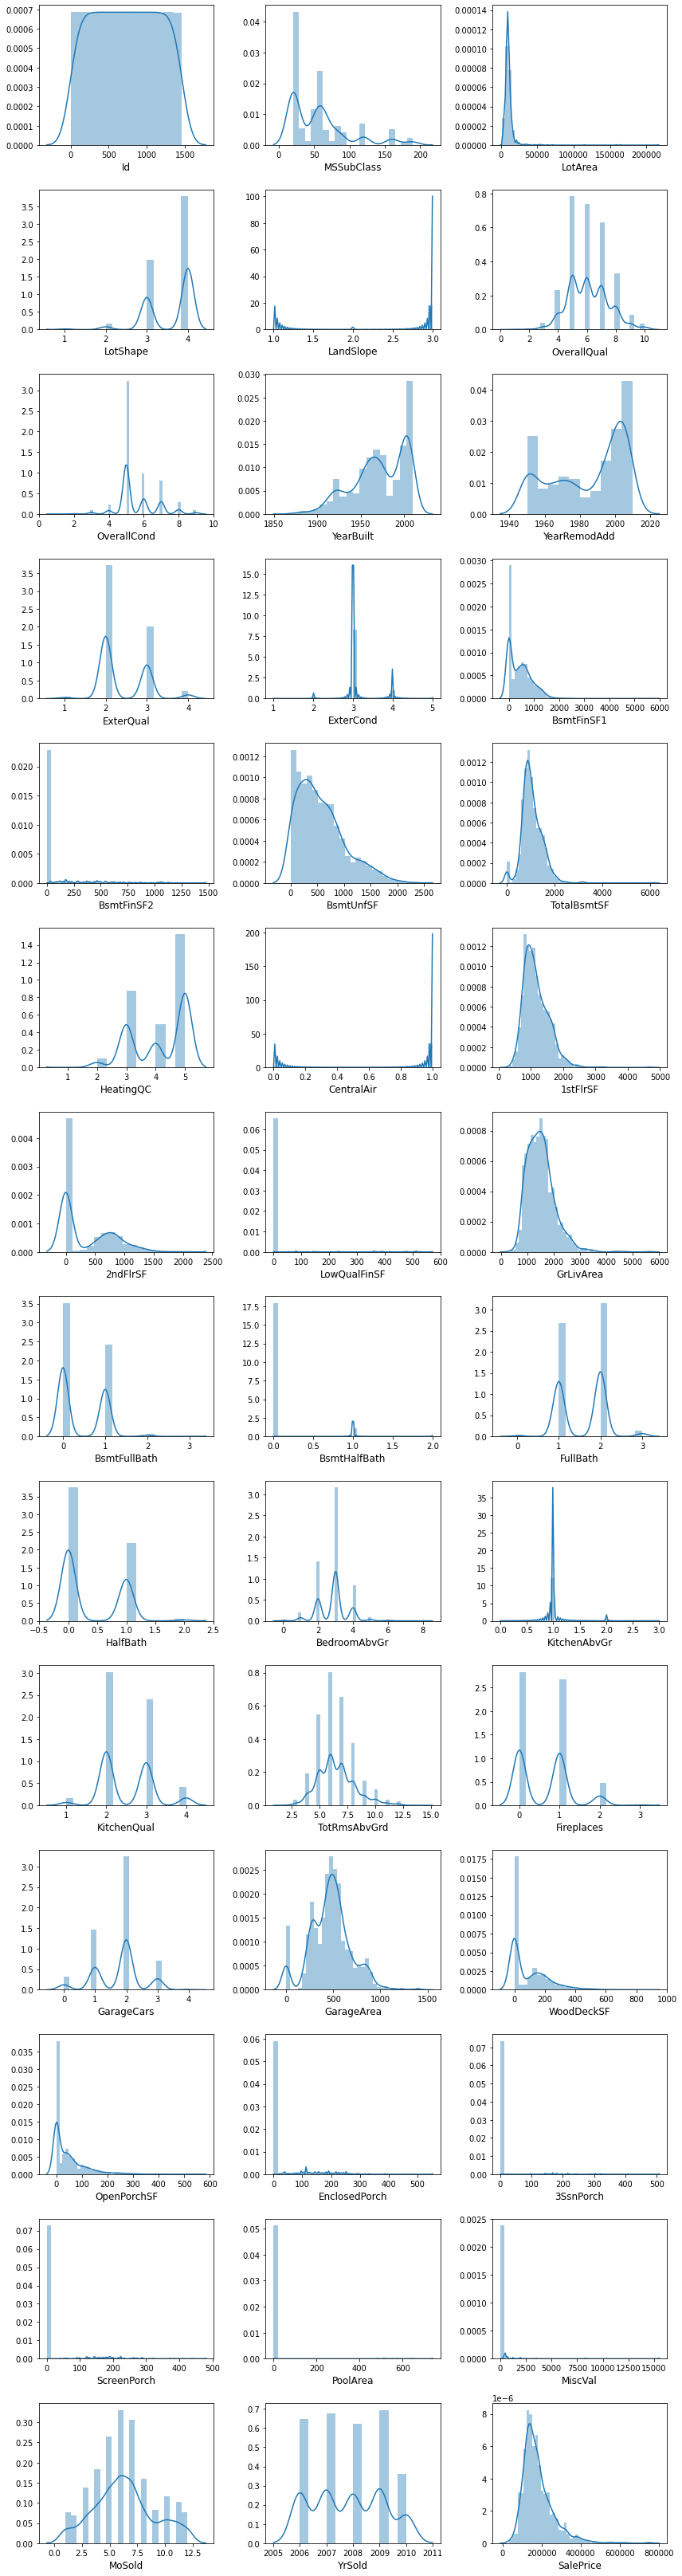

In [64]:
#  SUBPLOTS - FOR Loop
rowCnt = 14
colCnt = 3
subCnt = 1     # initialize plot number

fig = plt.figure(figsize=(12,45))

for i in df_train.columns:
    fig.add_subplot(rowCnt, colCnt, subCnt)
    plt.xlabel(i, fontsize=12)
    sns.distplot(df_train[i])
    subCnt = subCnt + 1

plt.tight_layout()
plt.show()

__下記に対して対数変換__

In [65]:
log_columns = ['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

In [66]:
for column in log_columns:
    df_train[column + '_Log'] = df_train[column].apply(np.log)

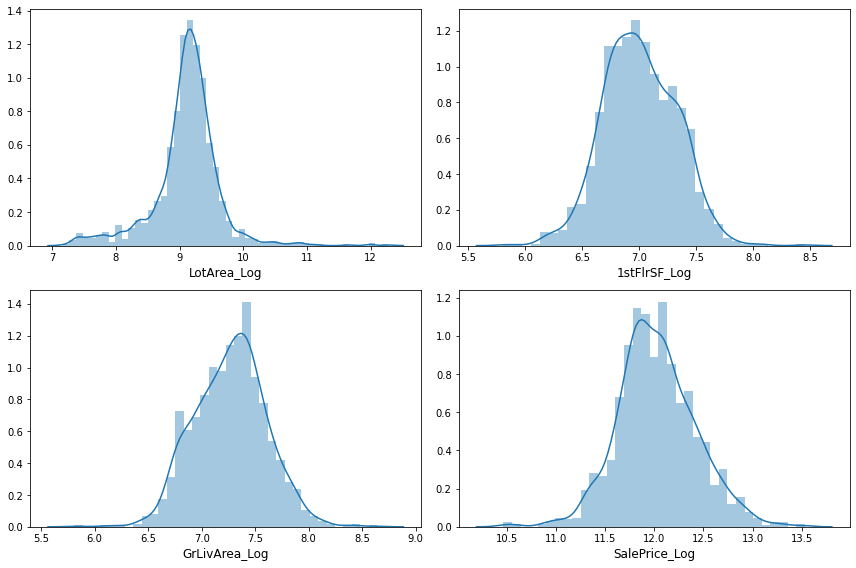

In [67]:
#  SUBPLOTS - FOR Loop
rowCnt = 2
colCnt = 2
subCnt = 1     # initialize plot number

fig = plt.figure(figsize=(12,8))

for column in log_columns:
    fig.add_subplot(rowCnt, colCnt, subCnt)
    plt.xlabel((column + '_Log'), fontsize=12)
    sns.distplot(df_train[(column + '_Log')])
    subCnt = subCnt + 1

plt.tight_layout()
plt.show()

__相関性の確認__

In [68]:
corr_matrix = df_train.corr()

<AxesSubplot:>

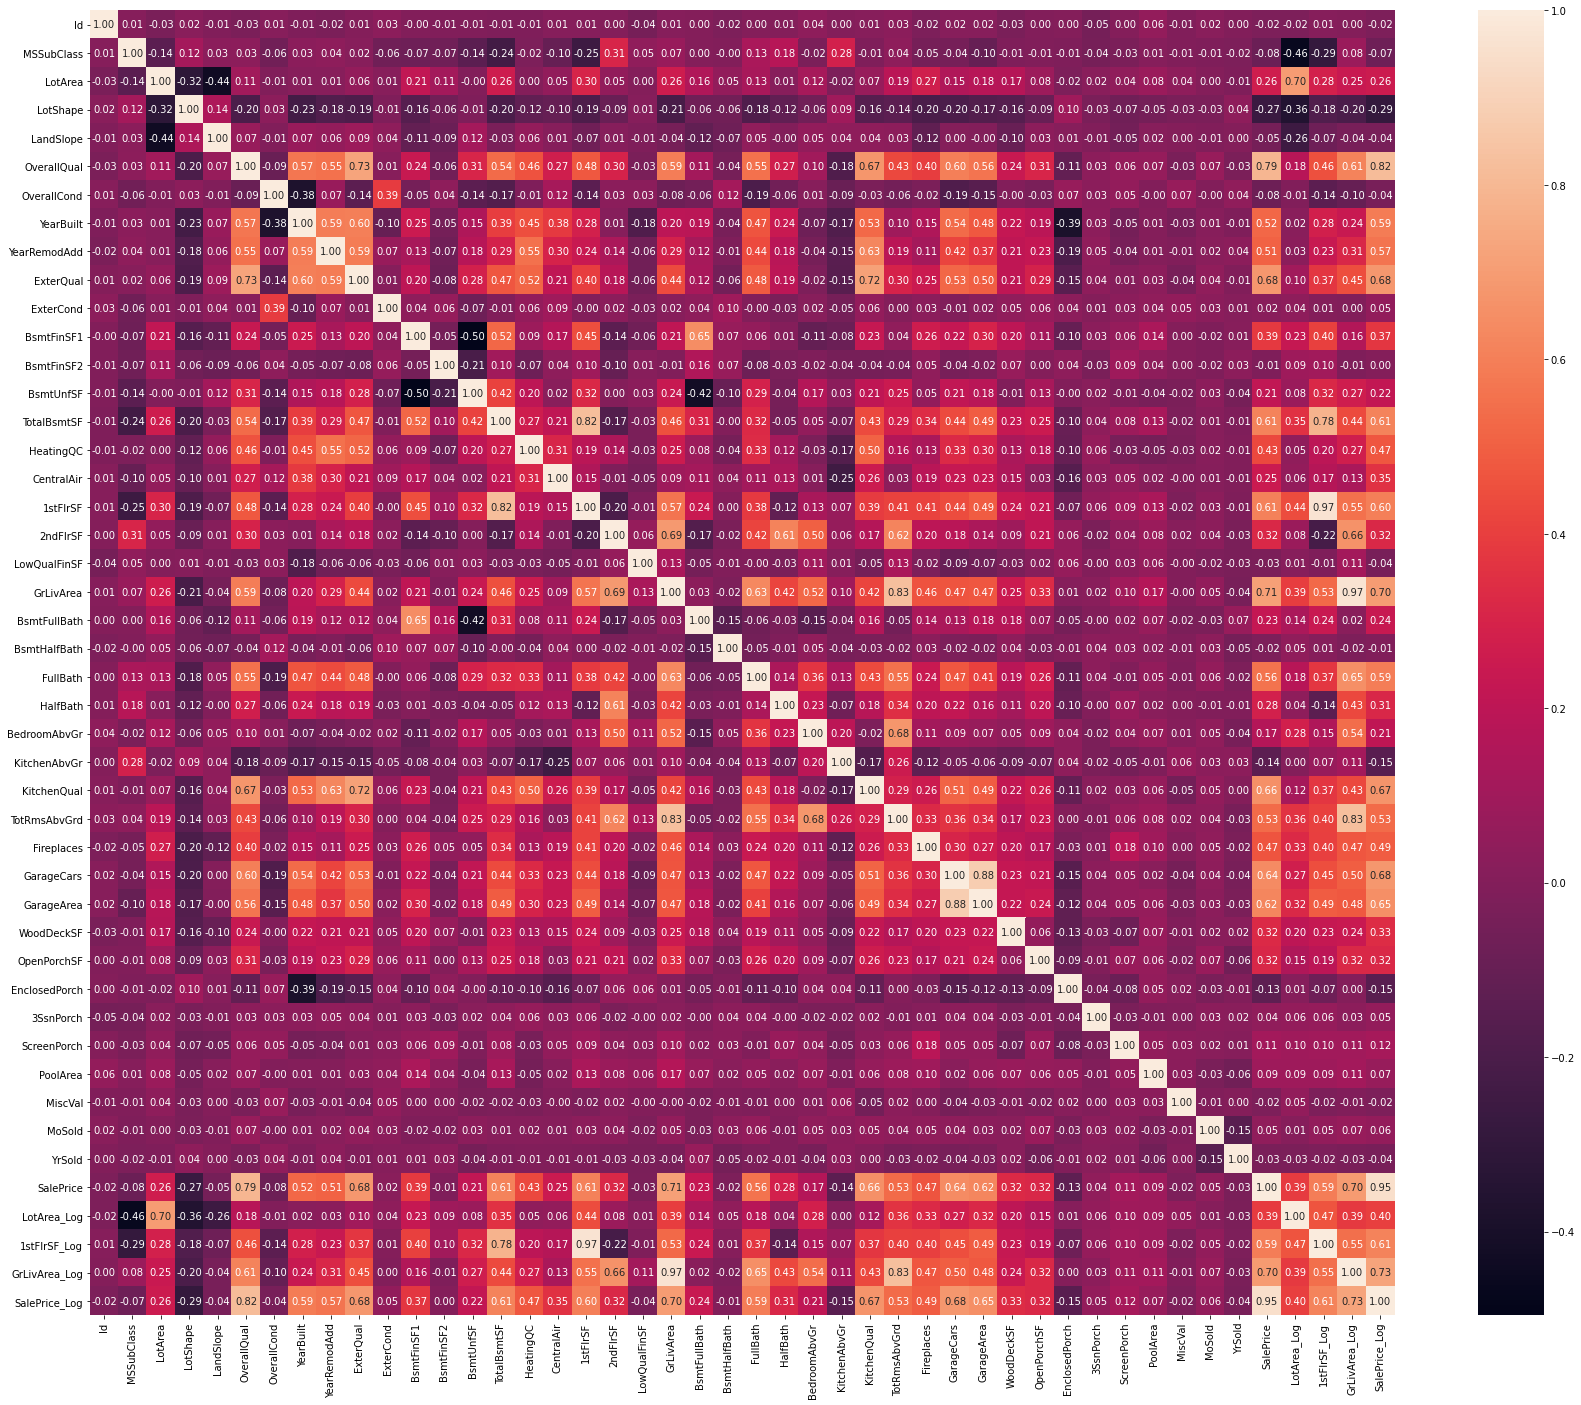

In [69]:
plt.figure(figsize=(30, 24))  
sns.heatmap(corr_matrix, annot=True, square=True, fmt='.2f')

In [70]:
corr_y = pd.DataFrame({'features':corr_matrix.columns,
                       'objective_variable':corr_matrix['SalePrice_Log']},
                      index=None)
corr_y = corr_y.reset_index(drop=True)
corr_y.style.background_gradient()

,features,objective_variable
0,Id,-0.0179694
1,MSSubClass,-0.073971
2,LotArea,0.257321
3,LotShape,-0.286055
4,LandSlope,-0.0385285
5,OverallQual,0.817368
6,OverallCond,-0.0368672
7,YearBuilt,0.586827
8,YearRemodAdd,0.565822
9,ExterQual,0.678956


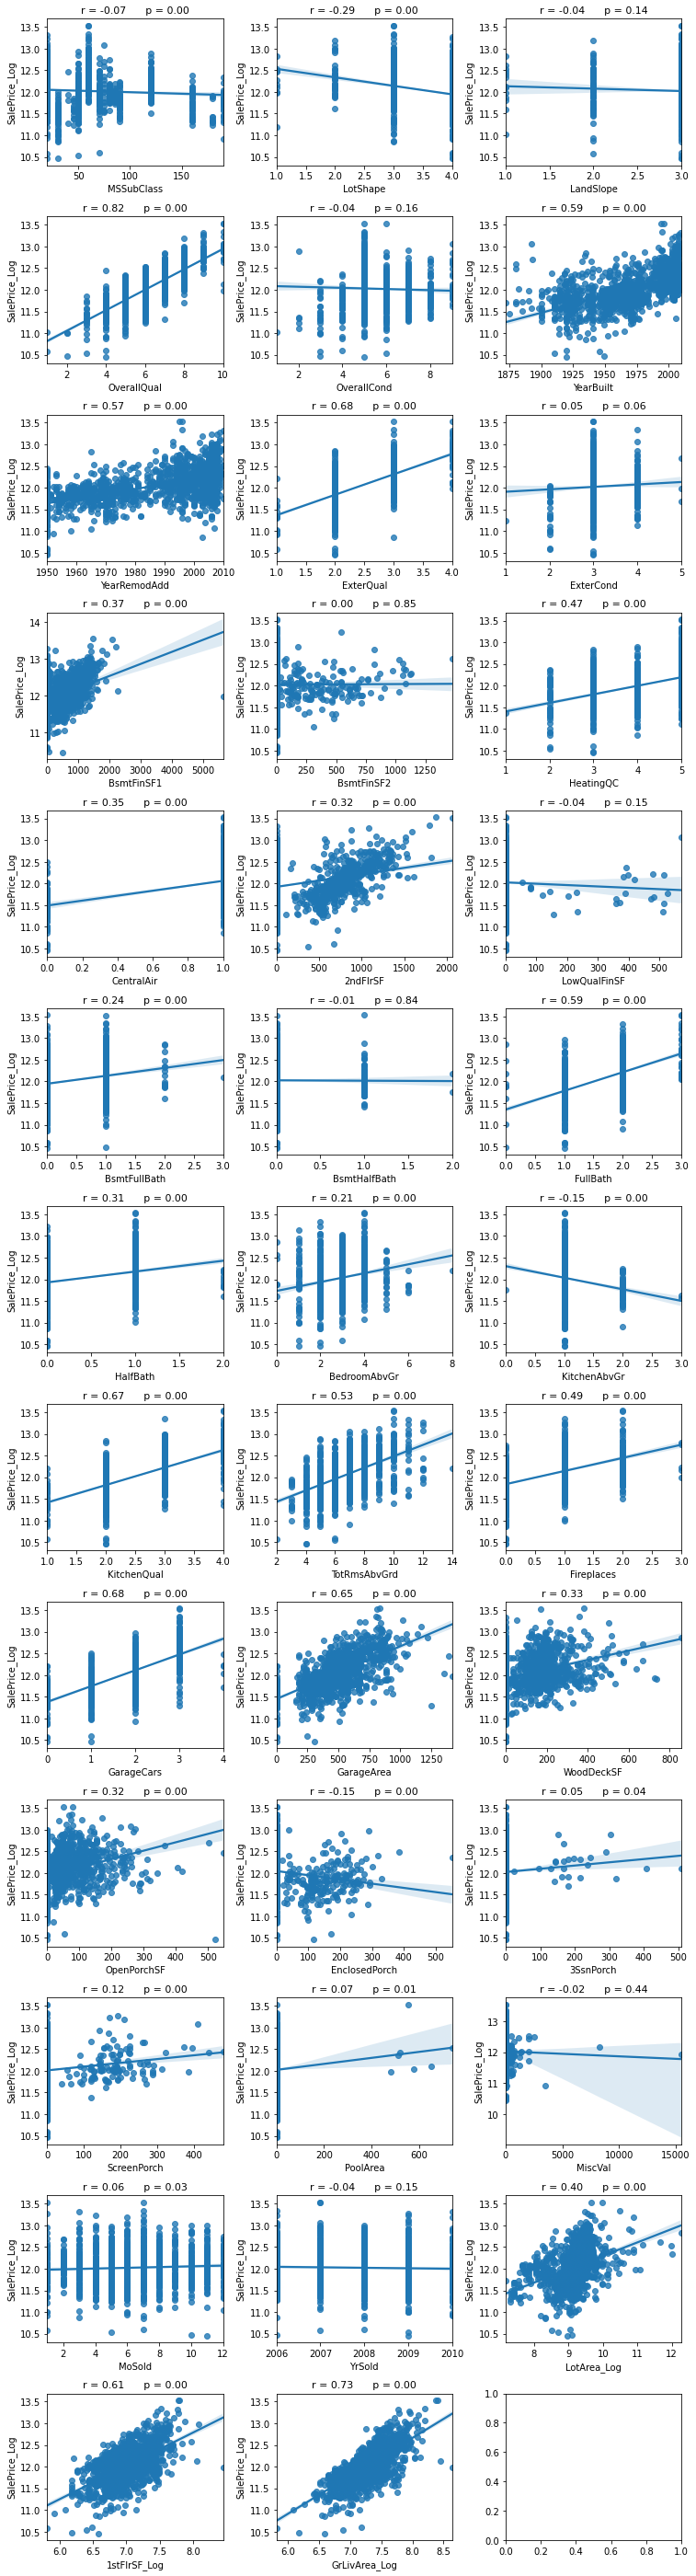

In [71]:
nr_rows = 13
nr_cols = 3
target = 'SalePrice_Log'

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

#li_num_feats = list(numerical_feats)
li_not_plot = ['Id', 'SalePrice', 'SalePrice_Log', 'LotArea', 'BsmtUnfSF',
              'TotalBsmtSF', '1stFlrSF', 'GrLivArea']
li_plot_num_feats = [c for c in df_train.columns if c not in li_not_plot]


for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_plot_num_feats):
            sns.regplot(df_train[li_plot_num_feats[i]], df_train[target], ax = axs[r][c])
            stp = stats.pearsonr(df_train[li_plot_num_feats[i]], df_train[target])
            #axs[r][c].text(0.4,0.9,"title",fontsize=7)
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
plt.show() 

__ID、SalePrice、及び対数変換した列の削除__

In [72]:
delete_columns = ['Id', 'SalePrice', 'LotArea', 'BsmtUnfSF',
                  'TotalBsmtSF', '1stFlrSF', 'GrLivArea']

for column in delete_columns:
    df_train.drop(column, axis=1, inplace=True)

In [73]:
df_train.columns

Index(['MSSubClass', 'LotShape', 'LandSlope', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'ExterQual', 'ExterCond', 'BsmtFinSF1',
       'BsmtFinSF2', 'HeatingQC', 'CentralAir', '2ndFlrSF', 'LowQualFinSF',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'LotArea_Log', '1stFlrSF_Log', 'GrLivArea_Log',
       'SalePrice_Log'],
      dtype='object')

__前処理・訓練データと検証データの分割__

In [74]:
df = df_train.to_numpy()
X = df_train.loc[:, df_train.columns != 'SalePrice_Log'].to_numpy()
y = df_train.loc[:, df_train.columns == 'SalePrice_Log'].to_numpy()

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

__前処理・標準化__

In [76]:
scaler = StandardScaler()

In [77]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [78]:
X_train_scaled = scaler.transform(X_train)

In [79]:
X_test_scaled = scaler.transform(X_test)

__モデルによる学習、推定、評価、可視化__

1. 線形回帰

In [80]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train.ravel())
lr_pred = lr_model.predict(X_test_scaled)

In [81]:
print("Mean Squared Error: {:.5f}".format(mean_squared_error(y_test, lr_pred)))

Mean Squared Error: 0.02185


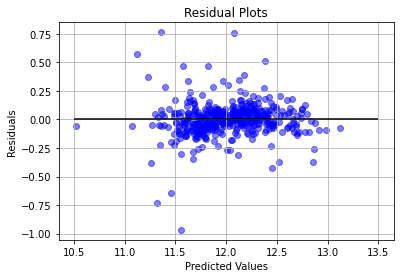

In [82]:
# テスト用データの残差プロット
plt.scatter(lr_pred, (lr_pred[:, np.newaxis] - y_test), c='b', alpha=0.5)

# y=0の水平線
plt.hlines(y=0,xmin=10.5,xmax=13.5, color='black')

plt.title('Residual Plots')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()

plt.show()  

2. SVM

In [83]:
svm_model = SVR()
svm_model.fit(X_train_scaled, y_train.ravel())
svm_pred = svm_model.predict(X_test_scaled)

In [84]:
print("Mean Squared Error: {:.5f}".format(mean_squared_error(y_test, svm_pred)))

Mean Squared Error: 0.02421


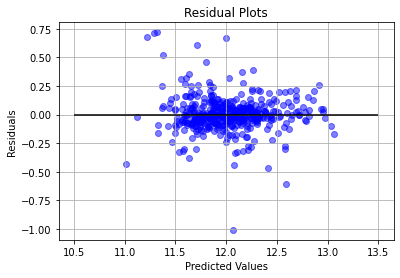

In [85]:
# テスト用データの残差プロット
plt.scatter(svm_pred, (svm_pred[:, np.newaxis] - y_test), c='b', alpha=0.5)

# y=0の水平線
plt.hlines(y=0,xmin=10.5,xmax=13.5, color='black')

plt.title('Residual Plots')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()

plt.show()  

3. 決定木

In [86]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train_scaled, y_train.ravel())
dt_pred = dt_model.predict(X_test_scaled)

In [87]:
print("Mean Squared Error: {:.5f}".format(mean_squared_error(y_test, dt_pred)))

Mean Squared Error: 0.03503


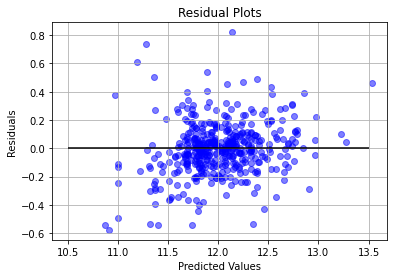

In [88]:
# テスト用データの残差プロット
plt.scatter(dt_pred, (dt_pred[:, np.newaxis] - y_test), c='b', alpha=0.5)

# y=0の水平線
plt.hlines(y=0,xmin=10.5,xmax=13.5, color='black')

plt.title('Residual Plots')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()

plt.show()  

4. ランダムフォレスト

In [89]:
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train_scaled, y_train.ravel())
rf_pred = rf_model.predict(X_test_scaled)

In [90]:
print("Mean Squared Error: {:.5f}".format(mean_squared_error(y_test, rf_pred)))

Mean Squared Error: 0.02095


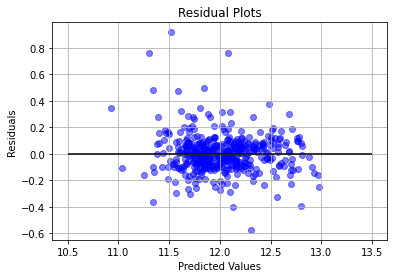

In [91]:
# テスト用データの残差プロット
plt.scatter(rf_pred, (rf_pred[:, np.newaxis] - y_test), c='b', alpha=0.5)

# y=0の水平線
plt.hlines(y=0,xmin=10.5,xmax=13.5, color='black')

plt.title('Residual Plots')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()

plt.show()  

- 指標値一覧表

In [92]:
def performance_measures(df, var):
    for key in range(len(var)):
        df.loc[df.index[key], 'MSE'] = mean_squared_error(y_test, var[key])
    return df

In [93]:
model_indexes = ['Linear Regression', 'SVM', 'Decision Tree', 'Random Forest']
score_columns = ['MSE']
predict_variables = [lr_pred, svm_pred, dt_pred, rf_pred]
performance_eval_scaled = pd.DataFrame(index=model_indexes, columns=score_columns)
performance_eval_scaled = performance_measures(performance_eval_scaled, predict_variables)

In [94]:
performance_eval_scaled

,MSE
Linear Regression,0.021853
SVM,0.0242072
Decision Tree,0.035025
Random Forest,0.0209467


__考察__

ランダムフォレスト が最良のモデルとなっている。\
問題3の特徴量をGrLivAreaとYearBuiltに絞った場合と比較して、\
モデルの性能は向上している。



In [95]:
#df['SalePrice_Log'].apply(np.exp)